In [1]:
import base64
import requests
import json
from PIL import Image
from io import BytesIO

# クレデンシャルの設定
# MeCabサーバの情報を設定しておく
url = "XXXXXXXXXX"    #接続先のURL
user_id = "user-XXXXXXX"    #ユーザーID
personal_access_token = "XXXXXXXX"   #アクセストークン

In [2]:
# 評価の実行
sample_path = '../sample/'
in_image = 'IMG_0217.png'
auth = (user_id,personal_access_token)
file = {'upload_file': open(sample_path + in_image, 'rb')}
result = requests.post(url, files=file,auth=auth)

In [3]:
# jsonでパース（文字で返ってくる）
json_result = json.loads(result.content)
json_result["result"]

'iVBORw0KGgoAAAANSUhEUgAAAggAAAIICAIAAACEnoE0AAAH3klEQVR4nO3d2W7cOBBA0XaQ//9lz0Nmxq5Yam1kcTvnKQgCWHBIXrG19OsFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEzgo/UBAMHnzt+bq6Qx2KAXe0nYZOpSj9EFd/xZxEvNn0tJ+M4EpgbjCq75uYg/mUW3k1DqAOAnIwpOOVzBb8ylIlV4cgCwyViCvz1Zr0/OqLJJuHEA8IZRBK9X7sl7vSqc+elwyBCC1PP32lV4/9PhDCOH1eWs1B+JP2vzR8N5xgyra7JYJzPPueRX6wMAqlshfhQkDCzNigk/CQMsQQI5TxgACIQBVmHTwEnCwLoslLBJGGAhWsgZwgBr0QYOCQMAgTCwKCfOsEcYYDmiyHvCAEAgDAAEwgBAIAywIpcZeEMYYEW+oYE3hAGAQBhgObYLvCcMAATCAGuxXeCQMAAQCAMAgTAAEAgDAIEwsKJln/t15Zkzfrc+AMizbA/gEmFgcmIAVwkD05IEuMc1BuakCnCbMAAQCAMTsl2AJ4SB2agCPCQMsAoPMXCSMAAQCAMAgTAAEAgDAIEwABAIAwCBMAAQCANT8XTbHg8xcJ4wMA9VgCKEgUmoApTi+xgYniRAWcLAwCQBahAGxqMHUJUwMBJJgAQuPjMMVbjNvapcIgwABMIAQCAMDMPnIZBDGAAIhIGR2DTc4JfGVcLAYCxzUJswMB5tgKpMMQbjaYZLzHBuMGwYgx7cYHpzj4+SGIAqQCanFHRNEm4zt7nNS/TolCRAK8JAG9Z96JbtJtkkIYGJzRN2DCTRAxiFu5LIoAqZbBd4SBgACISBDM5hYSDCQBJtyOH3zHPCAEAgDORxMlub3zBFCAOprFzQP2EAIBAGmITdGKUYS+TxmFsN5jDFGVRUpwf1mMDUYFxRhtU/malLPUYXF1j

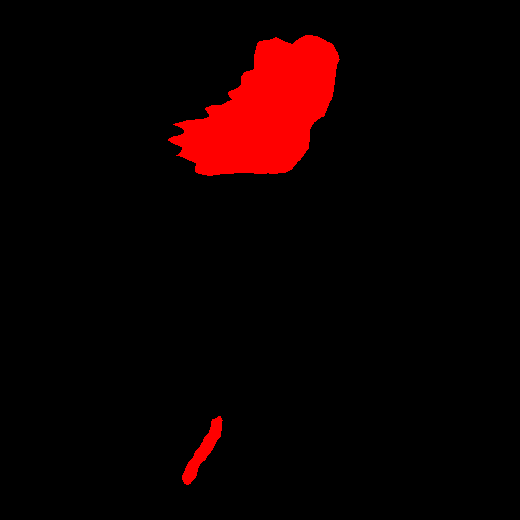

In [4]:
# 出力結果の可視化
data = json_result["result"]
img = Image.open(BytesIO(base64.b64decode(data)))
img

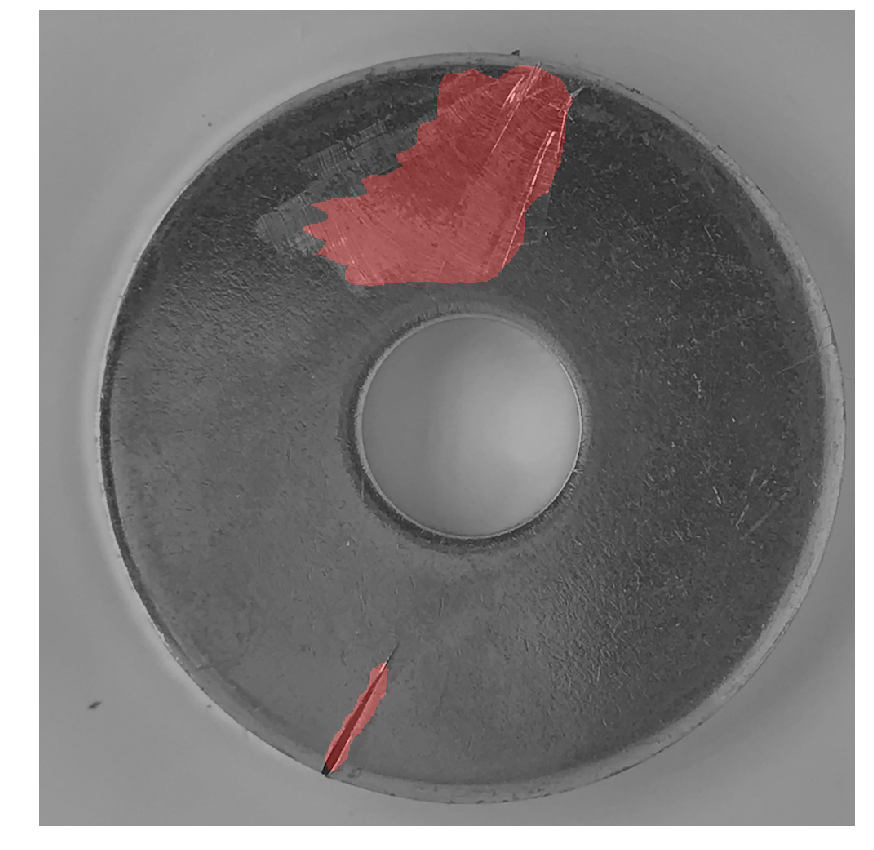

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# resultの一時保存と読み込み(inputと同じサイズで出力する)
img1 = cv2.imread(sample_path + in_image)
img_resize = img.resize((img1.shape[0], img1.shape[1]))
img_resize.save(sample_path + "result_"  + in_image)
img2 = cv2.imread(sample_path + "result_" + in_image)

# アルファブレンディング
alpha = 0.7

blended = cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

# 結果を表示する
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()